In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif

from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)


df = pd.read_csv('matchups_20_with_tiers.csv')
#df = df[df['round'] == 'Second Round']
df = df[df['round'].isin(['Final Four', 'Championship'])]

# Split dataset into a train and test set
X = df.iloc[:,8:]
y = df['win']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape

print(X_train.shape)
X_train.head()

(48, 65)


,kenpom_adjem,kenpom_adjoe,kenpom_adjde,off_eff,def_eff,tempo,adj_tempo,off_efg_pct,off_to_pct,off_or_pct,...,D_B,D_C,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F
652,2.0343,78.4405,-76.4062,81.0610,-81.0610,0.8661,1.2172,-5.4892,62.2503,-25.3053,...,0,0,0,0,0,0,0,0,0,0
841,-4.1815,81.7934,-85.9752,78.8030,-78.8030,-3.3332,-3.9786,3.5926,64.3332,-42.6644,...,0,0,0,0,0,0,0,0,0,0
698,3.9082,84.5604,-80.6517,69.5696,-69.5696,4.5926,3.8929,-0.8307,67.9548,-36.7768,...,0,0,0,0,0,0,0,0,0,0
906,-8.2182,81.8749,-90.0935,77.6272,-77.6272,-4.8280,-3.9178,2.3867,67.7723,-47.4532,...,0,0,0,0,0,0,0,0,0,0
1014,7.1272,89.8789,-82.7522,84.0526,-84.0526,5.0599,6.3810,9.9520,59.4389,-39.3212,...,0,0,0,0,0,0,0,0,0,0


In [123]:
train_df = pd.concat([X_train, y_train], axis=1)
X_cat = train_df[['S_S', 'S_A', 'S_B', 'S_C', 'S_D', 'S_F', 'A_S', 'A_A', 'A_B', 'A_C',
       'A_D', 'A_F', 'B_S', 'B_A', 'B_B', 'B_C', 'B_D', 'B_F', 'C_S', 'C_A',
       'C_B', 'C_C', 'C_D', 'C_F', 'D_S', 'D_A', 'D_B', 'D_C', 'D_D', 'D_F',
       'F_S', 'F_A', 'F_B', 'F_C', 'F_D', 'F_F']]

In [124]:
s_tiers = X_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = X_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = X_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = X_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = X_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = X_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      26
     1    0    0    0    0       9
1    0    0    0    0    0       8
0    0    1    0    0    0       3
          0    1    0    0       2
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      33
1    0    0    0    0    0      10
0    1    0    0    0    0       4
     0    1    0    0    0       1
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      41
1    0    0    0    0    0       5
0    0    1    0    0    0       2
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      44
     1    0    0    0    0       2
     0    1    0    0    0       1
1    0    0    0    0    0       1
dtype: int64
D_S  D_A  D_B  D_C  D_D  D_F
0    0    0    0    0    0      48
dtype: int64
F_S  F_A  F_B  F_C  F_D  F_F
0    0    0    0    0    0      48
dtype: int64


In [125]:
# Keep tiers with 5 or more occurrences
all_tiers = train_df[['win',
                     'S_S',
                     'S_A',
                     'A_S',
                     'B_S']]

In [126]:
all_tiers.groupby(by=['win', 'S_S']).size()

win  S_S
0    0      22
     1       4
1    0      18
     1       4
dtype: int64

In [127]:
all_tiers.groupby(by=['win', 'S_A']).size()

win  S_A
0    0      25
     1       1
1    0      14
     1       8
dtype: int64

In [128]:
all_tiers.groupby(by=['win', 'A_S']).size()

win  A_S
0    0      16
     1      10
1    0      22
dtype: int64

In [129]:
all_tiers.groupby(by=['win', 'B_S']).size()

win  B_S
0    0      23
     1       3
1    0      20
     1       2
dtype: int64

In [131]:
# Keep tiers with win % greater that 60 or less than 40
tiers_stats = X_train[[
                   'S_A',  
                   'A_S']]

Text(0, 0.5, 'Mutual Information')

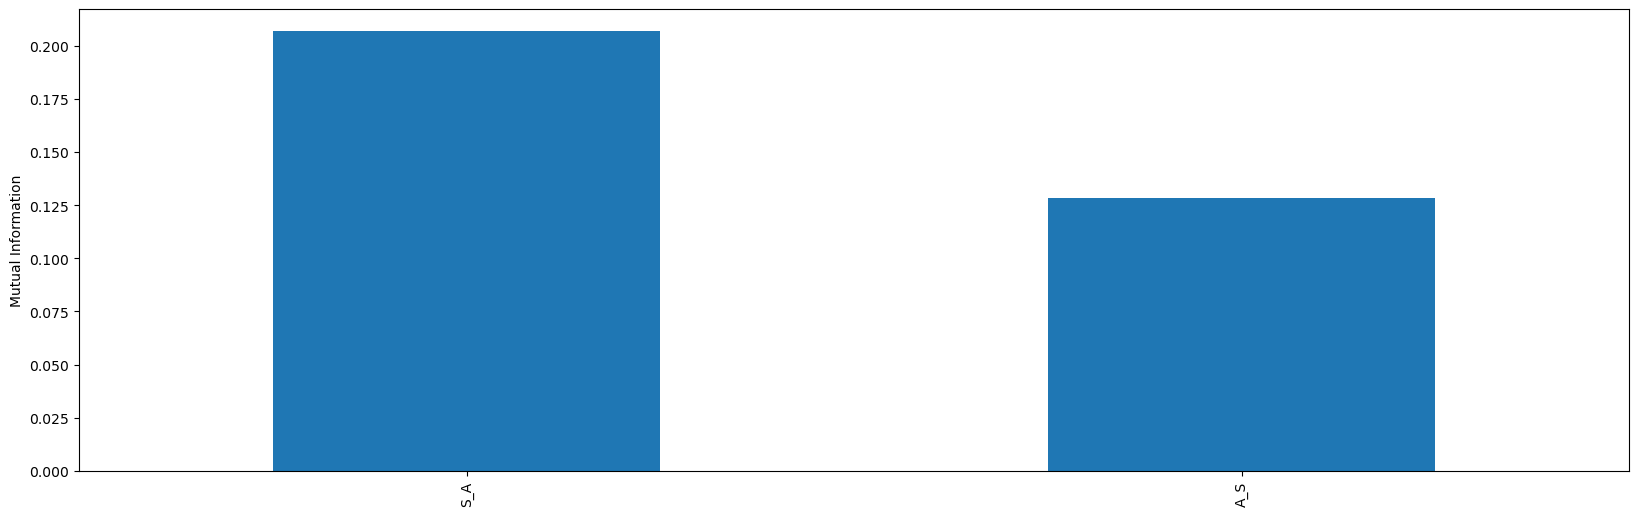

In [132]:
mi = mutual_info_classif(tiers_stats, y_train)
mi = pd.Series(mi)
mi.index = tiers_stats.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [133]:
chi_ls = []

for feature in tiers_stats.columns:
    c = pd.crosstab(y_train, tiers_stats[feature])
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

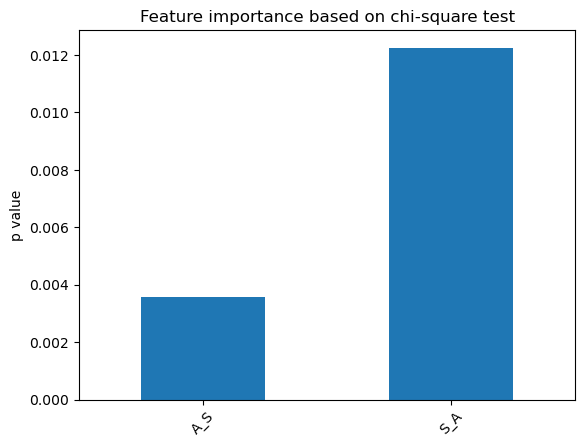

In [134]:
pd.Series(chi_ls, index=tiers_stats.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')